## Insights and Analysis

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb
result = pd.read_csv("twitter_archive_master.csv")

### Insight 1. Which dog type receive most retweet and favorites

From the data we can conclude: Bedlington Terrier received the most retweet and favorites.

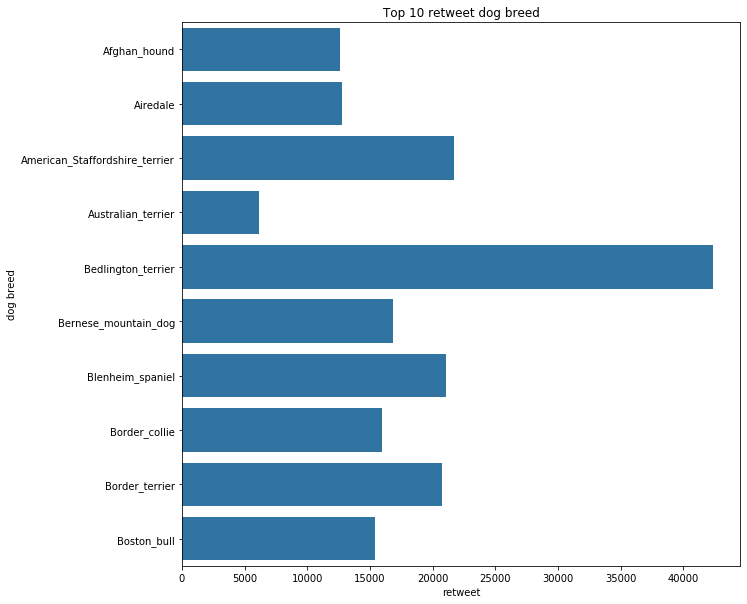

In [2]:
g = result.groupby(['final_pred']).sum().reset_index().head(10)
plt.figure(figsize=(10,10))
base_color = sb.color_palette()[0]
ax = sb.barplot(data = g, y = 'final_pred', x = 'retweet',color = base_color)
y = plt.ylabel('dog breed')
title = plt.title('Top 10 retweet dog breed')

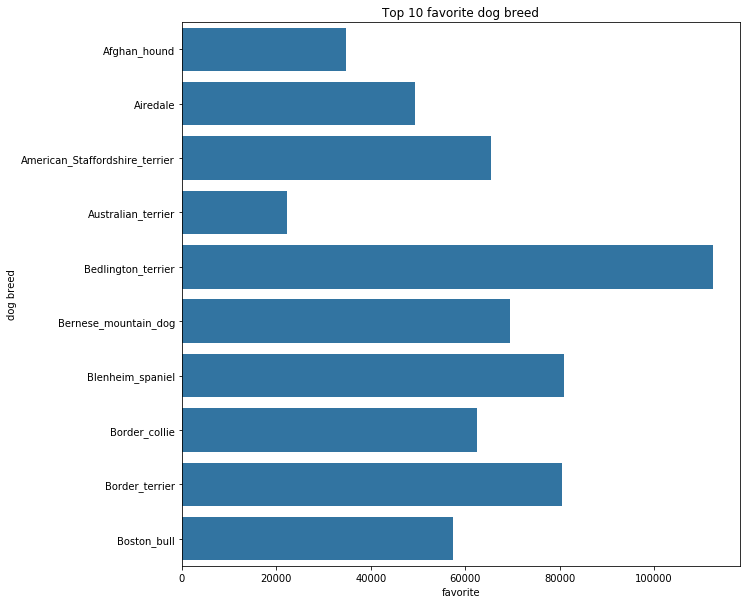

In [3]:
plt.figure(figsize=(10,10))
base_color = sb.color_palette()[0]
ax = sb.barplot(data = g, y = 'final_pred', x = 'favorite',color = base_color)
y = plt.ylabel('dog breed')
title = plt.title('Top 10 favorite dog breed')

### Insight 2. Which dog type receive the highest average rating
From the data we can conclude: Border Terrier receive the highest average rating

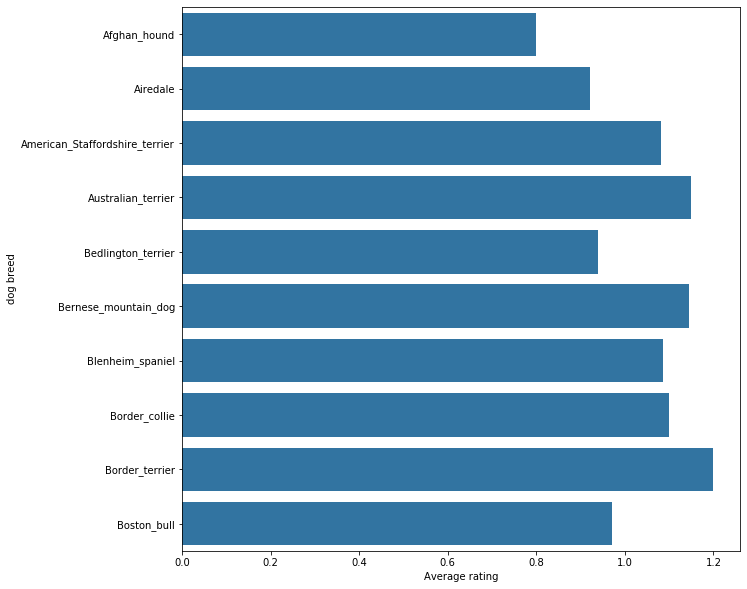

In [4]:
r = result.groupby(['final_pred']).mean().reset_index().head(10)
plt.figure(figsize=(10,10))
base_color = sb.color_palette()[0]
ax = sb.barplot(data = r, y = 'final_pred', x = r['rating_numerator']/r["rating_denominator"],color = base_color)
y = plt.ylabel('dog breed')
x = plt.xlabel('Average rating')

### Insights 3: Year over year average rating for top 10 favorite dog breed
From the data we can conclude: for the top 10 favorite dog breed, the ratings has an increase trend from 2015 to 2017. This may indicate this twitter account receives more popularity that has more data/ratings(need more info to validate).

In [5]:
top_10_breed = result.groupby(['final_pred']).mean().reset_index().head(10)['final_pred']
result = result[result['final_pred'].isin(top_10_breed)]
result['timestamp'] = pd.to_datetime(result['timestamp'])
d = result.groupby(result['timestamp'].dt.year).mean().reset_index()

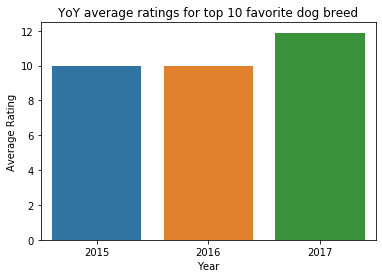

In [6]:
ax = sb.barplot(y='rating_numerator',x='timestamp',data=d)
y = plt.ylabel('Average Rating')
x = plt.xlabel('Year')
title = plt.title('YoY average ratings for top 10 favorite dog breed')